This is just some experimenting with getting graph algorithms to solve NP-hard problems. I am working through "Artificial Intelligence: A modern approach" and one of the questions asks the reader to compare solving the travelling salesperson problem with A* and RBFS. Unfortunately, the code repository for the book contains a completely broken implementation of the TSP problem that does not work with any of the graph search algorithms. So here is an implementation that works with all the graph algorithms. My next post will compare A* and RBFS using the MST heuristic. 

initial route ('N', 'V', 'T', 'O', 'R', 'F', 'P', 'G', 'C', 'E', 'A', 'D')
initial route cost 2817.232683928372
a_good_path ('T', 'A', 'O', 'R', 'P', 'F', 'N', 'V', 'E', 'G', 'C', 'D')
a_good_path cost 1602.00375849783
('G', 'E', 'V', 'N', 'F', 'P', 'R', 'O', 'A', 'T', 'D', 'C')
1602.0037584978302


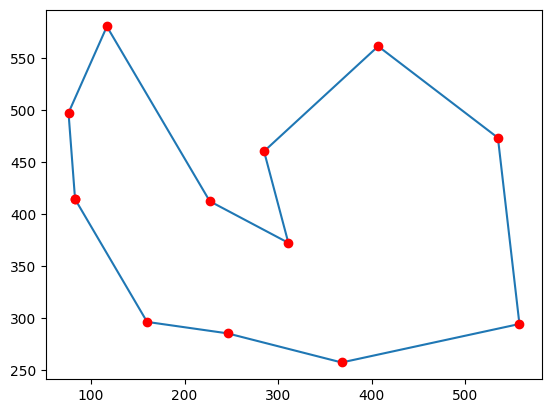

In [2]:
from search_2 import *
import numpy as np
import matplotlib.pyplot as plt

romania = {'A': ( 76, 497), 'D': (160, 296),
           'E': (558, 294), 'G': (368, 257),
           'N': (407, 561), 'R': (227, 412),
           'T': ( 83, 414), 'V': (535, 473),
           'O': (117, 580), 'P': (311, 372),
           'C': (246, 285), 'F': (285, 460)}

distances = {}

a_good_path = ('T', 'A', 'O', 'R', 'P', 'F', 'N', 'V', 'E', 'G', 'C', 'D')

for city in romania.keys():
    distances[city] = {}

for name_1, coordinates_1 in romania.items():
        for name_2, coordinates_2 in romania.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

def cost(route):
    c = 0
    for i in range(len(route)-1):
        c += distances[route[i]][route[i+1]]
    c += distances[route[0]][route[-1]]
    return c

class TSP(Problem):
    
    def two_opt(self, state):
        neighbour_state = state[:]
        left = random.randint(0, len(neighbour_state) - 1)
        right = random.randint(0, len(neighbour_state) - 1)
        if left > right:
            left, right = right, left
        neighbour_list = list(neighbour_state)
        x = neighbour_list[left: right + 1]
        neighbour_list[left: right + 1] = x[::-1]
        neighbour_state = tuple(neighbour_list)
        return neighbour_state
        
    def is_goal(self, state):
        return cost(state) < 1603
    
    def actions(self, state): 
        """The places neighboring `state`."""
        new_states = set()
        for i in range(6):
            new_state = self.two_opt(state)
            new_states.add(new_state)
        return new_states
    
    def result(self, state, action):
        """Go to the `action` place, if the map says that is possible."""
        return action
    
    def action_cost(self, s, action, s1):
        """The distance (cost) to go from s to s1."""
        if(type(action) == tuple):
            return cost(action)


initial_route = list(romania.keys())
random.shuffle(initial_route)

initial_route = tuple(initial_route)

print("initial route", initial_route)
print("initial route cost", cost(initial_route))
print("a_good_path", a_good_path)
print("a_good_path cost", cost(a_good_path))

r0 = TSP(initial = initial_route)
path = path_states(uniform_cost_search(r0)) 
print(path[-1])
print(cost(path[-1]))

data = []
for p in a_good_path:
    data.append(romania[p])
data.append(data[0])

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()